<a href="https://colab.research.google.com/github/aartijadhav25/aartijadhav25/blob/main/Stock_price_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
df=pd.read_csv('/content/FINAL_FROM_DF.csv')


In [ ]:
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [ ]:
df.tail()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
846399,ZOTA,SM,221.0,221.00,214.00,217.00,217.0,220.0,14000,3041550.0,2017-12-29,14,INE358U01012
846400,ZUARI,EQ,562.0,562.00,549.55,550.80,552.0,556.8,105184,58163061.6,2017-12-29,2218,INE840M01016
846401,ZUARIGLOB,EQ,255.5,258.40,252.50,253.25,253.0,254.1,90067,22968100.6,2017-12-29,2001,INE217A01012
846402,ZYDUSWELL,EQ,1038.0,1068.00,1033.00,1043.20,1035.0,1023.1,28601,29938840.1,2017-12-29,1401,INE768C01010
846403,ZYLOG,EQ,4.3,5.15,4.30,4.65,4.6,4.4,732051,3495213.7,2017-12-29,845,INE225I01026


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846404 entries, 0 to 846403
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SYMBOL       846404 non-null  object 
 1   SERIES       843947 non-null  object 
 2   OPEN         846404 non-null  float64
 3   HIGH         846404 non-null  float64
 4   LOW          846404 non-null  float64
 5   CLOSE        846404 non-null  float64
 6   LAST         846404 non-null  float64
 7   PREVCLOSE    846404 non-null  float64
 8   TOTTRDQTY    846404 non-null  int64  
 9   TOTTRDVAL    846404 non-null  float64
 10  TIMESTAMP    846404 non-null  object 
 11  TOTALTRADES  846404 non-null  int64  
 12  ISIN         846404 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 83.9+ MB


In [ ]:
df.isnull().sum()

,0
SYMBOL,0
SERIES,2457
OPEN,0
HIGH,0
LOW,0
CLOSE,0
LAST,0
PREVCLOSE,0
TOTTRDQTY,0
TOTTRDVAL,0


In [ ]:
print(df['SYMBOL'].value_counts())

SYMBOL
SRTRANSFIN    4709
IDFCBANK      4379
IRFC          4362
NHAI          3360
RECLTD        2919
              ... 
M17RD            1
CP7RG            1
IPRU2814         1
VF1RG            1
SGBDEC2512       1
Name: count, Length: 2037, dtype: int64


In [ ]:
print(df['SERIES'].value_counts())

SERIES
EQ    739199
BE     37428
SM     11229
N6      5080
N2      4828
       ...  
HB         7
H6         7
HE         1
HA         1
BT         1
Name: count, Length: 71, dtype: int64


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
846399,False
846400,False
846401,False
846402,False


In [47]:
df.describe()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,VOLATILITY
count,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5.105000e+03,5.105000e+03,5105,5105.000000,5105.000000
mean,3782.987818,3798.362045,3776.911126,3791.632627,3760.708435,3789.266586,5.006379e+05,1.791147e+08,2017-07-16 02:02:25.269343744,2863.549853,0.765094
min,52.350000,52.750000,51.200000,52.100000,0.000000,52.100000,1.000000e+00,1.011600e+03,2017-01-24 00:00:00,1.000000,0.000000
25%,1155.000000,1160.000000,1152.000000,1156.800000,1150.000000,1157.000000,1.200000e+01,5.992239e+04,2017-04-26 00:00:00,2.000000,0.000000
50%,1800.100000,1810.000000,1792.650000,1800.100000,1765.000000,1799.000000,4.000000e+01,1.658080e+05,2017-07-14 00:00:00,5.000000,0.268170
75%,7476.000000,7505.010000,7461.260000,7500.360000,7500.350000,7500.100000,5.900000e+02,7.423438e+05,2017-10-06 00:00:00,11.000000,0.888099
max,8799.000000,8800.000000,8416.000000,8425.000000,8425.000000,8425.000000,1.005650e+08,1.426400e+11,2017-12-29 00:00:00,547304.000000,46.615124
std,2930.147517,2940.280241,2928.039625,2937.539766,2968.298883,2935.291980,2.911631e+06,2.119116e+09,NaN,12813.523231,1.876575


In [48]:
# Add a column for daily price range
df['PRICE_RANGE'] = df['HIGH'] - df['LOW']
df['PRICE_RANGE']

,PRICE_RANGE
554,17.20
555,0.00
625,1.15
626,112.50
627,0.00
...,...
845320,2.87
845321,0.00
845322,6.01
845323,3.99


In [49]:
# Add a column for percentage change from previous close to current close
df['PCT_CHANGE'] = ((df['CLOSE'] - df['PREVCLOSE']) / df['PREVCLOSE']) * 100
df['PCT_CHANGE']

,PCT_CHANGE
554,-0.071958
555,-1.474926
625,-0.718133
626,-0.728155
627,-0.099713
...,...
845320,-1.669725
845321,0.197161
845322,-0.123308
845323,0.061240


In [50]:
#check for duplicates
duplicates = df.duplicated().sum()
duplicates


0

In [54]:
# Remove duplicates
data = df.drop_duplicates()
data

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,VOLATILITY,PRICE_RANGE,PCT_CHANGE
554,HDFCBANK,EQ,1665.0,1675.00,1657.80,1666.45,1666.50,1667.65,1112259,1.853115e+09,2017-06-28,33276,INE040A01026,1.037520,17.20,-0.071958
555,HDFCBANK,IL,1670.0,1670.00,1670.00,1670.00,0.00,1695.00,43000,7.181000e+07,2017-06-28,1,INE040A01026,0.000000,0.00,-1.474926
625,IDFCBANK,EQ,55.3,55.95,54.80,55.30,55.25,55.70,9143866,5.061666e+08,2017-06-28,27629,INE092T01019,2.098540,1.15,-0.718133
626,IDFCBANK,N1,5000.0,5112.50,5000.00,5112.50,5112.50,5150.00,13,6.599850e+04,2017-06-28,6,INE092T08CC6,2.250000,112.50,-0.728155
627,IDFCBANK,N2,8015.0,8015.00,8015.00,8015.00,8015.00,8023.00,8,6.412000e+04,2017-06-28,3,INE092T08CD4,0.000000,0.00,-0.099713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845320,IRFC,NaN,1235.0,1237.87,1235.00,1237.87,1237.87,1258.89,110,1.361485e+05,2017-12-29,3,INE053F07686,0.232389,2.87,-1.669725
845321,IRFC,NE,1270.5,1270.50,1270.50,1270.50,1270.50,1268.00,100,1.270500e+05,2017-12-29,1,INE053F07744,0.000000,0.00,0.197161
845322,IRFC,NJ,1121.0,1121.01,1115.00,1117.77,1115.00,1119.15,1314,1.472513e+06,2017-12-29,9,INE053F07835,0.539013,6.01,-0.123308
845323,IRFC,NK,1130.0,1130.00,1126.01,1127.41,1126.01,1126.72,352,3.972009e+05,2017-12-29,5,INE053F07843,0.354349,3.99,0.061240


In [55]:
df


,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,VOLATILITY,PRICE_RANGE,PCT_CHANGE
554,HDFCBANK,EQ,1665.0,1675.00,1657.80,1666.45,1666.50,1667.65,1112259,1.853115e+09,2017-06-28,33276,INE040A01026,1.037520,17.20,-0.071958
555,HDFCBANK,IL,1670.0,1670.00,1670.00,1670.00,0.00,1695.00,43000,7.181000e+07,2017-06-28,1,INE040A01026,0.000000,0.00,-1.474926
625,IDFCBANK,EQ,55.3,55.95,54.80,55.30,55.25,55.70,9143866,5.061666e+08,2017-06-28,27629,INE092T01019,2.098540,1.15,-0.718133
626,IDFCBANK,N1,5000.0,5112.50,5000.00,5112.50,5112.50,5150.00,13,6.599850e+04,2017-06-28,6,INE092T08CC6,2.250000,112.50,-0.728155
627,IDFCBANK,N2,8015.0,8015.00,8015.00,8015.00,8015.00,8023.00,8,6.412000e+04,2017-06-28,3,INE092T08CD4,0.000000,0.00,-0.099713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845320,IRFC,NaN,1235.0,1237.87,1235.00,1237.87,1237.87,1258.89,110,1.361485e+05,2017-12-29,3,INE053F07686,0.232389,2.87,-1.669725
845321,IRFC,NE,1270.5,1270.50,1270.50,1270.50,1270.50,1268.00,100,1.270500e+05,2017-12-29,1,INE053F07744,0.000000,0.00,0.197161
845322,IRFC,NJ,1121.0,1121.01,1115.00,1117.77,1115.00,1119.15,1314,1.472513e+06,2017-12-29,9,INE053F07835,0.539013,6.01,-0.123308
845323,IRFC,NK,1130.0,1130.00,1126.01,1127.41,1126.01,1126.72,352,3.972009e+05,2017-12-29,5,INE053F07843,0.354349,3.99,0.061240


In [56]:
df.shape

(5105, 16)

In [58]:
from datetime import datetime
# Convert 'TIMESTAMP' to datetime format
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

# Get the current date and eight year back
end = datetime.now()
start = datetime(end.year - 8, end.month, end.day)

# Filter data for the last 8 year
df = df[(df['TIMESTAMP'] >= start) & (df['TIMESTAMP'] <= end)]

In [59]:
df.shape

(5105, 16)

In [ ]:
df = df[df['SYMBOL'].isin(['HDFCBANK', 'IDFCBANK', 'IRFC'])]

In [60]:
df.shape

(5105, 16)

In [61]:
df

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,VOLATILITY,PRICE_RANGE,PCT_CHANGE
554,HDFCBANK,EQ,1665.0,1675.00,1657.80,1666.45,1666.50,1667.65,1112259,1.853115e+09,2017-06-28,33276,INE040A01026,1.037520,17.20,-0.071958
555,HDFCBANK,IL,1670.0,1670.00,1670.00,1670.00,0.00,1695.00,43000,7.181000e+07,2017-06-28,1,INE040A01026,0.000000,0.00,-1.474926
625,IDFCBANK,EQ,55.3,55.95,54.80,55.30,55.25,55.70,9143866,5.061666e+08,2017-06-28,27629,INE092T01019,2.098540,1.15,-0.718133
626,IDFCBANK,N1,5000.0,5112.50,5000.00,5112.50,5112.50,5150.00,13,6.599850e+04,2017-06-28,6,INE092T08CC6,2.250000,112.50,-0.728155
627,IDFCBANK,N2,8015.0,8015.00,8015.00,8015.00,8015.00,8023.00,8,6.412000e+04,2017-06-28,3,INE092T08CD4,0.000000,0.00,-0.099713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845320,IRFC,NaN,1235.0,1237.87,1235.00,1237.87,1237.87,1258.89,110,1.361485e+05,2017-12-29,3,INE053F07686,0.232389,2.87,-1.669725
845321,IRFC,NE,1270.5,1270.50,1270.50,1270.50,1270.50,1268.00,100,1.270500e+05,2017-12-29,1,INE053F07744,0.000000,0.00,0.197161
845322,IRFC,NJ,1121.0,1121.01,1115.00,1117.77,1115.00,1119.15,1314,1.472513e+06,2017-12-29,9,INE053F07835,0.539013,6.01,-0.123308
845323,IRFC,NK,1130.0,1130.00,1126.01,1127.41,1126.01,1126.72,352,3.972009e+05,2017-12-29,5,INE053F07843,0.354349,3.99,0.061240


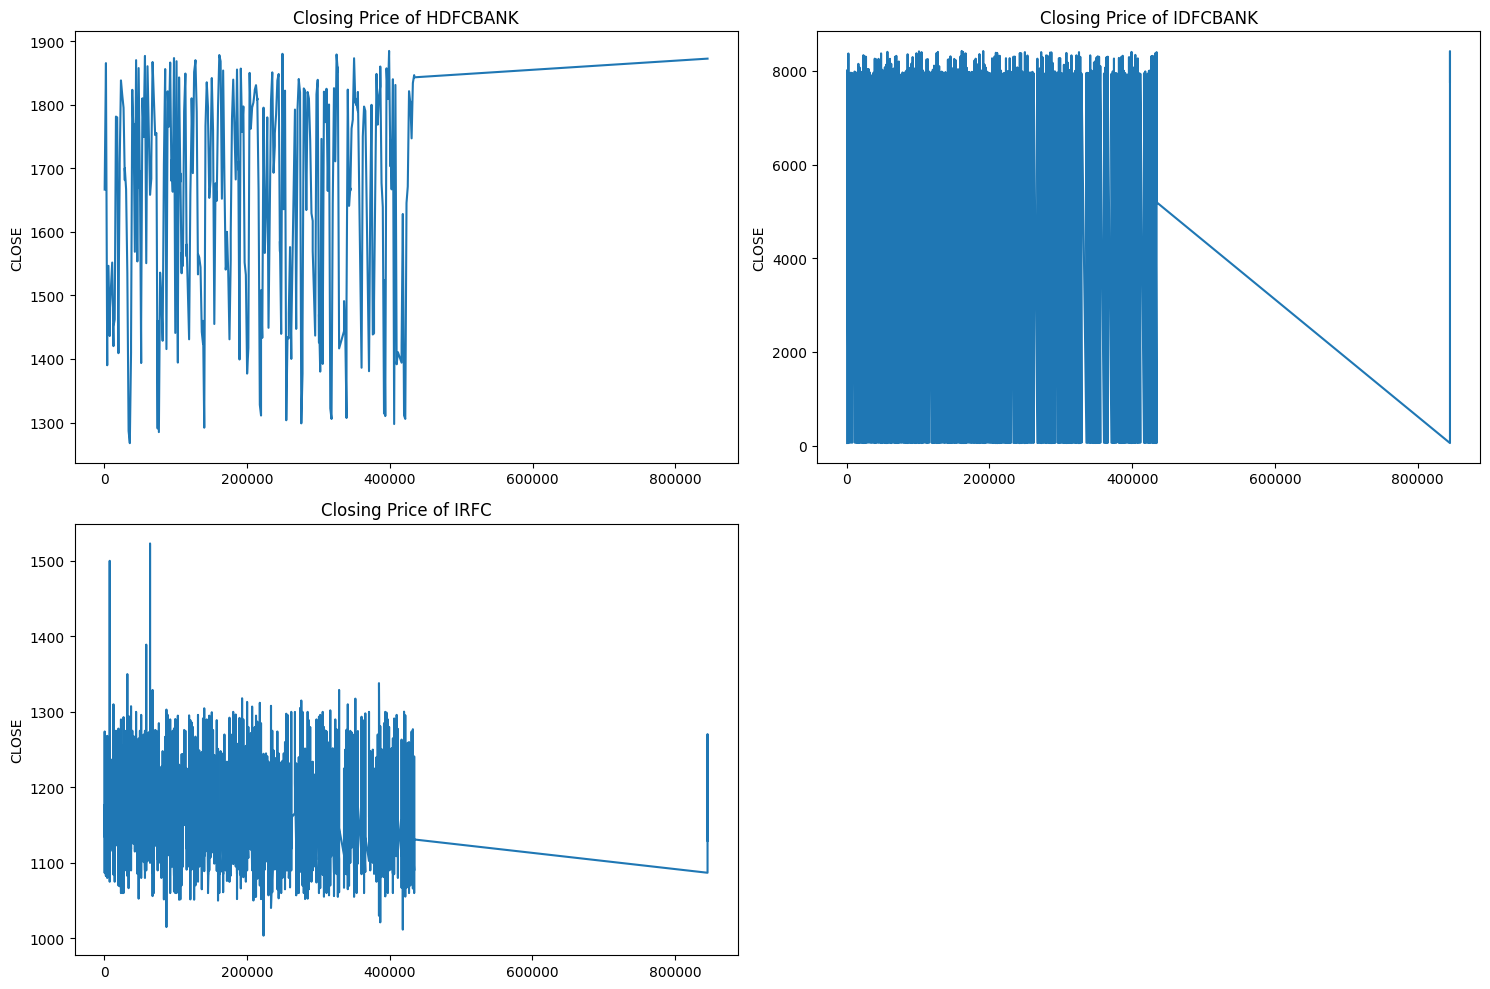

In [62]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(['HDFCBANK', 'IDFCBANK', 'IRFC'], 1):
    plt.subplot(2, 2, i)
    # Filter the DataFrame based on the company name
    company_df = df[df['SYMBOL'] == company]
    # Plot the 'CLOSE' column for the filtered data
    company_df['CLOSE'].plot()
    plt.ylabel('CLOSE')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")  # Use company directly for the title

plt.tight_layout()

<Axes: xlabel='TOTTRDVAL', ylabel='TOTALTRADES'>

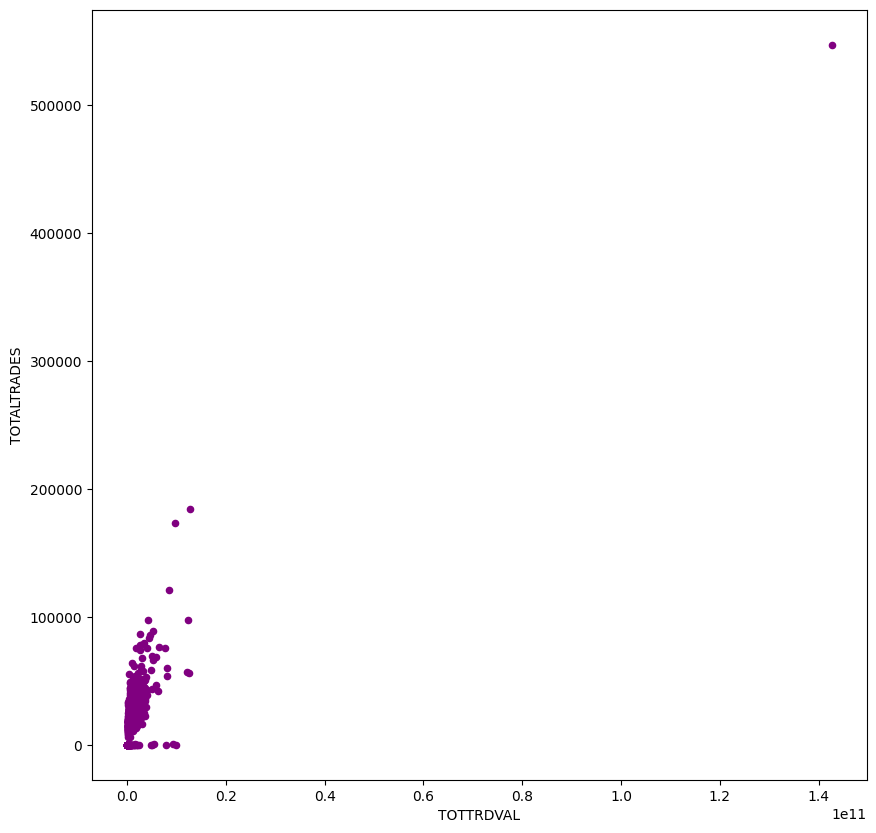

In [ ]:
df.plot.scatter(x='TOTTRDVAL', y='TOTALTRADES', color='purple', figsize=(10, 10))

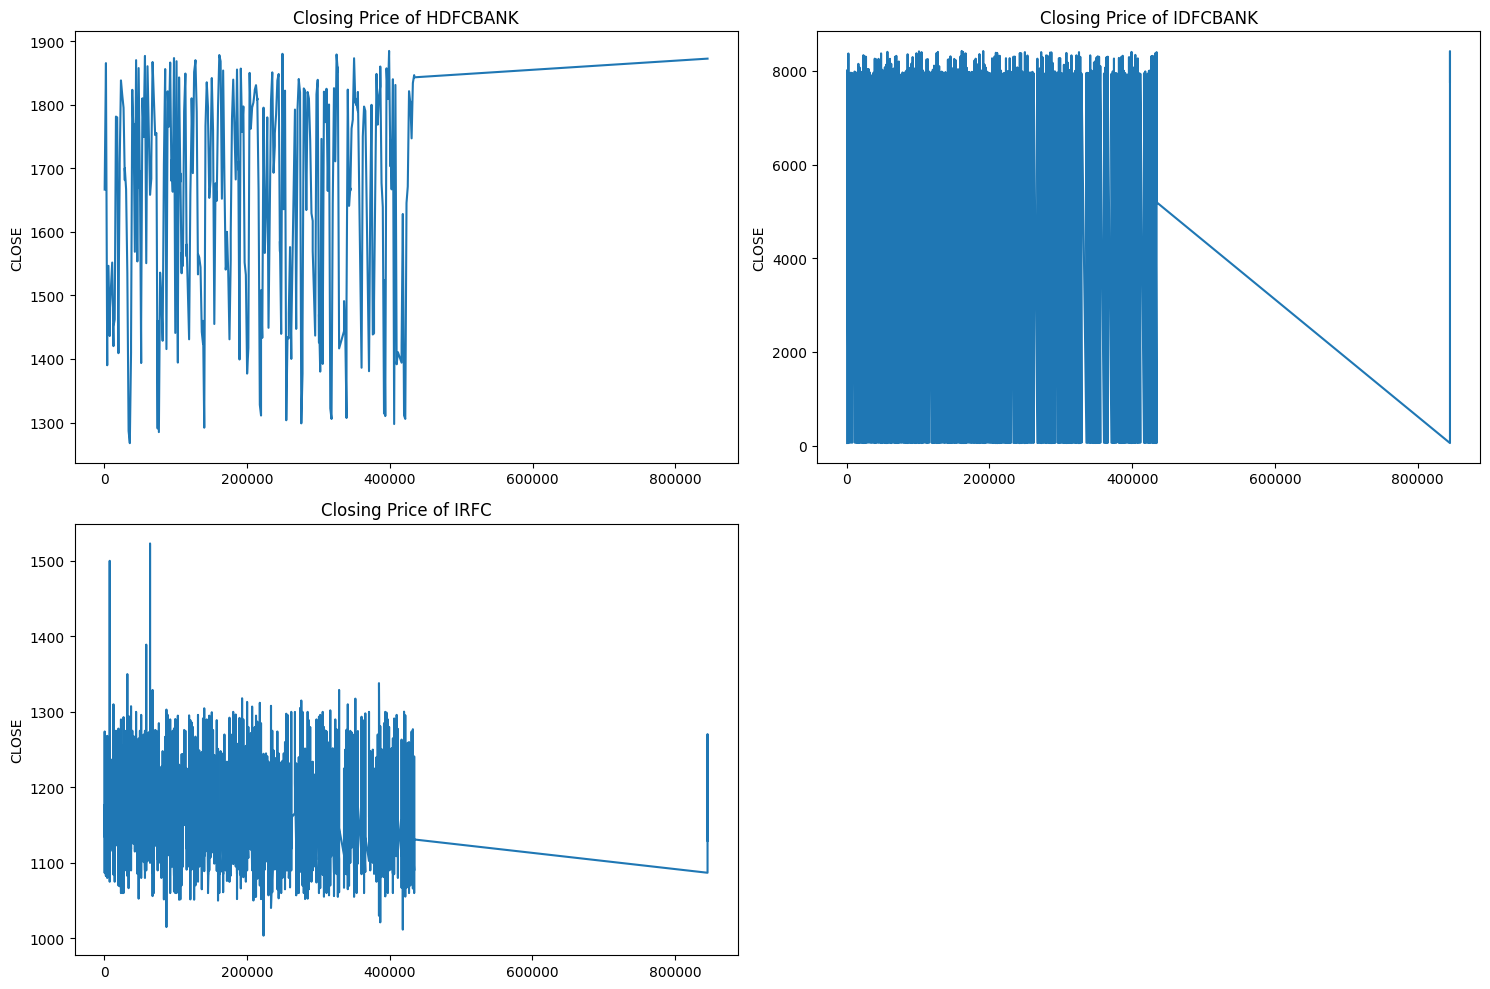

In [69]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(['HDFCBANK', 'IDFCBANK', 'IRFC'], 1):
    plt.subplot(2, 2, i)
    # Filter the DataFrame based on the company name
    company_df = df[df['SYMBOL'] == company]
    # Plot the 'CLOSE' column for the filtered data
    company_df['CLOSE'].plot()
    plt.ylabel('CLOSE')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")  # Use company directly for the title

plt.tight_layout()

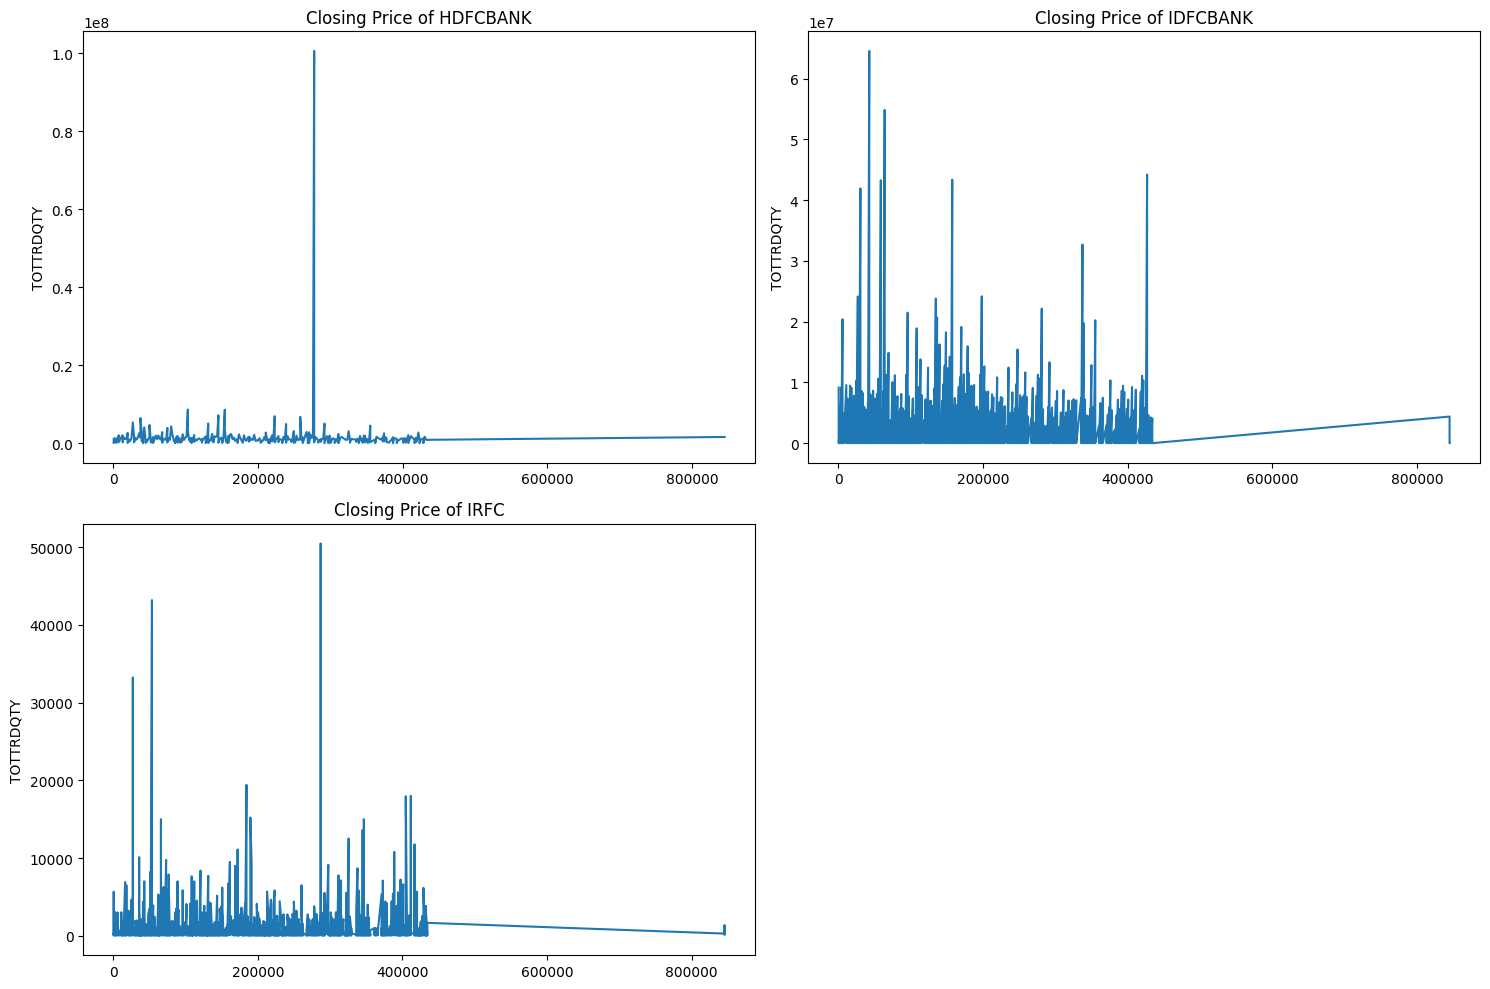

In [68]:

# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(['HDFCBANK', 'IDFCBANK', 'IRFC'], 1):
    plt.subplot(2, 2, i)
    # Filter the DataFrame based on the company name
    company_df = df[df['SYMBOL'] == company]
    # Plot the 'CLOSE' column for the filtered data
    company_df['TOTTRDQTY'].plot()
    plt.ylabel('TOTTRDQTY')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")  # Use company directly for the title

plt.tight_layout()

In [36]:
import pandas as pd

# Filter the data for 'HDFCBANK'
df_filtered = df[df['SYMBOL'] == 'HDFCBANK']

# Select only the required columns
df_filtered = df_filtered[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'TOTALTRADES', 'TIMESTAMP']]

# Convert 'TIMESTAMP' to datetime if not already
df_filtered['TIMESTAMP'] = pd.to_datetime(df_filtered['TIMESTAMP'])

# Set 'TIMESTAMP' as the index
df_filtered.set_index('TIMESTAMP', inplace=True)

# Display the filtered data with 'TIMESTAMP' as index
print(df_filtered.head())


              OPEN     HIGH      LOW    CLOSE  TOTALTRADES
TIMESTAMP                                                 
2017-06-28  1665.0  1675.00  1657.80  1666.45        33276
2017-06-28  1670.0  1670.00  1670.00  1670.00            1
2017-11-28  1856.0  1871.00  1855.85  1865.35        44306
2017-02-28  1392.9  1396.25  1384.50  1390.10        19486
2017-02-28  1440.0  1440.00  1440.00  1440.00            2


In [37]:
print(type(df_filtered.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [38]:
print(df_filtered.index.duplicated().sum())

94


In [39]:
df_filtered = df_filtered.groupby(df_filtered.index).agg({
    'OPEN': 'mean',          # Average opening price
    'HIGH': 'max',           # Maximum high price
    'LOW': 'min',            # Minimum low price
    'CLOSE': 'mean',         # Average closing price
    'TOTALTRADES': 'sum'     # Total trades
})

In [40]:
print(df_filtered.index.duplicated().sum())

0


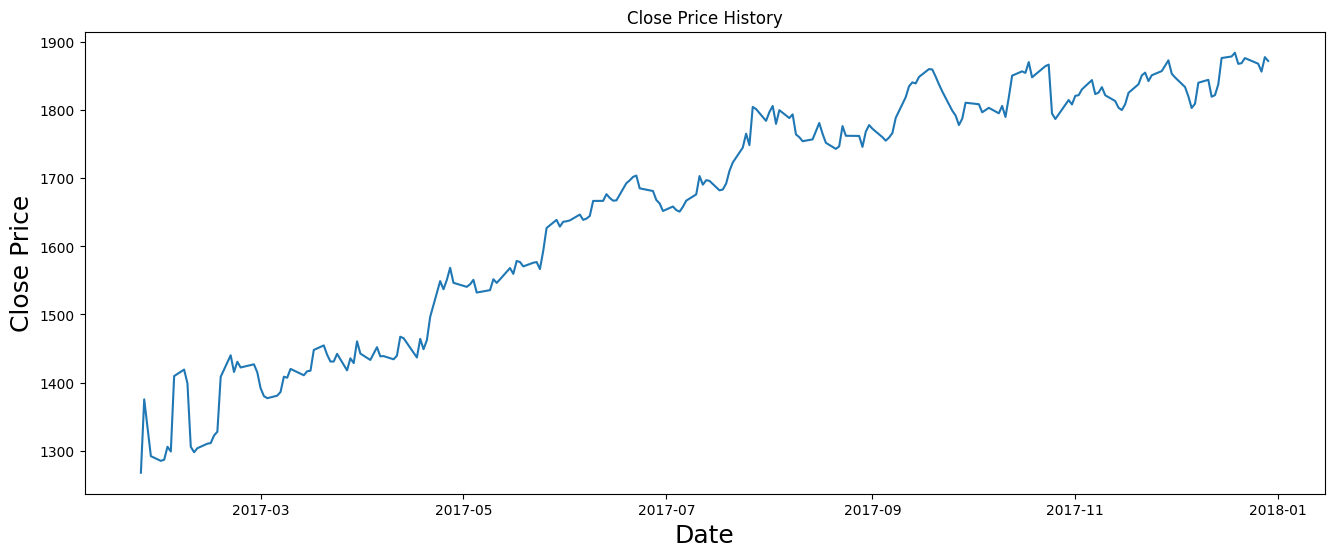

In [41]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_filtered['CLOSE'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [70]:
# Create a new dataframe with only the 'Close column
data = df_filtered.filter(['CLOSE'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

186

In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.17464949],
       [0.03946835],
       [0.02820326],
       [0.03095875],
       [0.06183645],
       [0.05049032],
       [0.230124  ],
       [0.24556285],
       [0.21278061],
       [0.06175541],
       [0.04878839],
       [0.05843261],
       [0.0691304 ],
       [0.07058919],
       [0.08858092],
       [0.09781992],
       [0.22850312],
       [0.27960126],
       [0.23988978],
       [0.26424346],
       [0.25058757],
       [0.25812465],
       [0.23907934],
       [0.20115082],
       [0.18242969],
       [0.17740498],
       [0.18348326],
       [0.19231704],
       [0.22862469],
       [0.22619337],
       [0.24718373],
       [0.23202853],
       [0.2415917 ],
       [0.24280736],
       [0.29236567],
       [0.30310398],
       [0.28106005],
       [0.26477024],
       [0.26477024],
       [0.28304563],
       [0.24373936],
       [0.27238836],
       [0.26104222],
       [0.31291028],
       [0.28365346],
       [0.26849826],
       [0.298

In [72]:

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.17464949, 0.03946835, 0.02820326, 0.03095875,
       0.06183645, 0.05049032, 0.230124  , 0.24556285, 0.21278061,
       0.06175541, 0.04878839, 0.05843261, 0.0691304 , 0.07058919,
       0.08858092, 0.09781992, 0.22850312, 0.27960126, 0.23988978,
       0.26424346, 0.25058757, 0.25812465, 0.23907934, 0.20115082,
       0.18242969, 0.17740498, 0.18348326, 0.19231704, 0.22862469,
       0.22619337, 0.24718373, 0.23202853, 0.2415917 , 0.24280736,
       0.29236567, 0.30310398, 0.28106005, 0.26477024, 0.26477024,
       0.28304563, 0.24373936, 0.27238836, 0.26104222, 0.31291028,
       0.28365346, 0.26849826, 0.29884918, 0.27708891, 0.27765621,
       0.27003809, 0.27870978, 0.3238512 , 0.32028527, 0.27433341,
       0.3186644 , 0.29410811, 0.31542264, 0.37126185, 0.45623632])]
[0.43682632304076474]

[array([0.        , 0.17464949, 0.03946835, 0.02820326, 0.03095875,
       0.06183645, 0.05049032, 0.230124  , 0.24556285, 0.21278061,
       0.06175541, 0.04878839, 0.05

In [73]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

# Build the improved LSTM model
model = Sequential()

# First LSTM layer with more units
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh'))
model.add(Dropout(0.3))  # Slightly increase dropout to prevent overfitting

# Second LSTM layer
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dropout(0.3))

# Dense layers for more expressiveness
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 514,021 (1.96 MB)

 Trainable params: 514,021 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:

from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=1,  # Use a more efficient batch size
    epochs=50,  # Train for more epochs
    validation_split=0.2,  # Use part of the training data for validation
    callbacks=[early_stopping],  # Stop if no improvement
    verbose=1
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - loss: 0.1509 - mae: 0.2858 - val_loss: 0.0177 - val_mae: 0.1234
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - loss: 0.0137 - mae: 0.0893 - val_loss: 0.0046 - val_mae: 0.0517
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - loss: 0.0123 - mae: 0.0874 - val_loss: 0.0060 - val_mae: 0.0600
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - loss: 0.0097 - mae: 0.0743 - val_loss: 0.0171 - val_mae: 0.1196
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - loss: 0.0118 - mae: 0.0824 - val_loss: 0.0105 - val_mae: 0.0884
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - loss: 0.0105 - mae: 0.0839 - val_loss: 0.0098 - val_mae: 0.0841
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - loss: 0.0100 - mae: 0.0786 - val_loss: 0.0179 - val_mae: 0.1232
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - loss: 0.0130 - mae: 0.0935 - val_loss: 0.0051 - val_mae: 0.0541
Epoch 9/50
100/100 ━━━━━━━━━━━━━

In [76]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [77]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [78]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [79]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 491ms/step


In [80]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

40.26617097457012

In [81]:
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 40.26617097457012


In [83]:
# R² Score Calculation
from sklearn.metrics import r2_score  # Import r2_score from sklearn.metrics
r2 = r2_score(y_test, predictions)
print("R² Score:", r2)

R² Score: -1.4464334709926692


In [84]:
# Step 1: Predict the next 30 days
last_60_days = scaled_data[-60:]  # Use the last 60 days of data as input
input_data = np.array(last_60_days).reshape(1, 60, 1)

In [85]:
# Predict the next 30 days
future_predictions = []

In [90]:
# Predict the next 30 days
future_predictions = []  # Initialize as a list

for day in range(30):
    next_day_price = model.predict(input_data)[0, 0]  # Predict the next day
    future_predictions.append(next_day_price)  # Append to the list
    # Update input_data with the new prediction
    # Reshape next_day_price to match the dimensions of input_data[:, 1:, :]
    next_day_price_reshaped = next_day_price.reshape(1, 1, 1)
    input_data = np.concatenate([input_data[:, 1:, :], next_day_price_reshaped], axis=1)

# Convert future_predictions to a NumPy array if needed
future_predictions = np.array(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/

In [91]:
# Convert future predictions back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


In [92]:
# Step 2: Prepare data for plotting
valid = data[training_data_len:].copy()  # Validation data
valid['Predictions'] = predictions  # Add predictions to the validation dataset

In [93]:
# Create a time range for the next 30 days
future_dates = pd.date_range(start=data.index[-1], periods=31, freq='B')[1:]  # Business days only

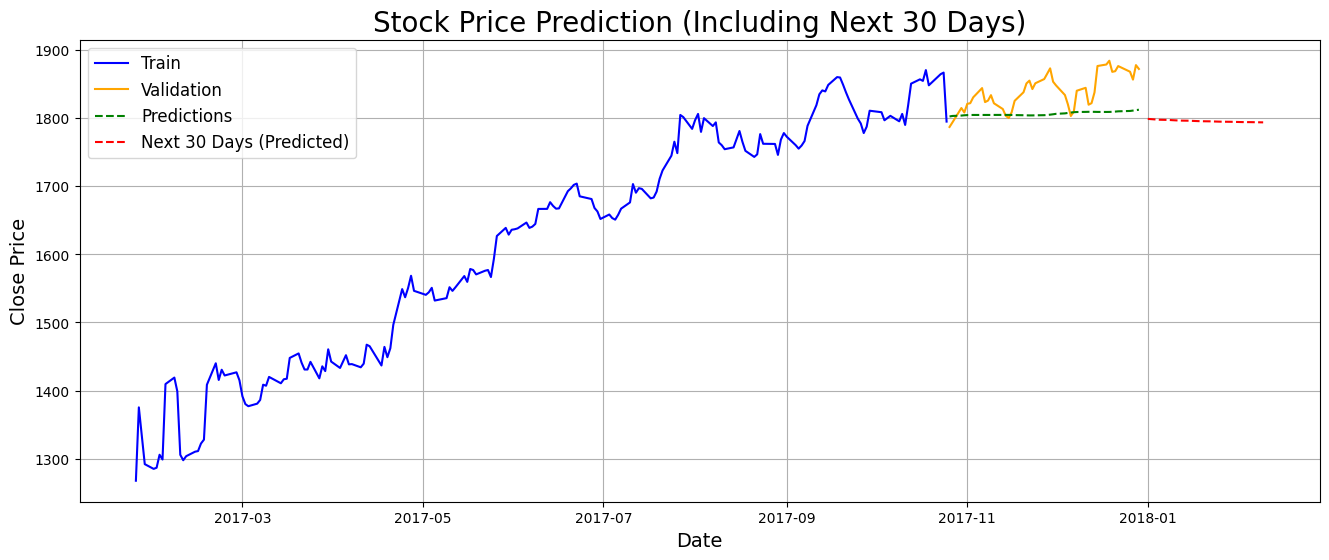

In [95]:
# Step 3: Visualize training, validation, and future predictions
plt.figure(figsize=(16, 6))
plt.title('Stock Price Prediction (Including Next 30 Days)', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
# Plot training and validation data
plt.plot(data['CLOSE'][:training_data_len], label='Train', color='blue')
plt.plot(valid['CLOSE'], label='Validation', color='orange')
plt.plot(valid['Predictions'], label='Predictions', color='green', linestyle='--')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Next 30 Days (Predicted)', color='red', linestyle='--')

# Add a legend
plt.legend(loc='upper left', fontsize=12)
plt.grid()

# Display the plot
plt.show()